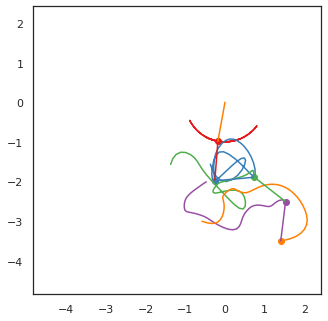

In [18]:
import torch
from biases.systems import ChainPendulum, MagnetPendulum
from IPython.core.display import display, HTML

#P = MagnetPendulum(magnets=0)
P = ChainPendulum(5, False, 1, 1)
z0 = P.sample_initial_conditions(1)
zt = P.integrate(z0,torch.linspace(0,10.,100))
HTML(P.animate(zt.data))

In [8]:
import torch
import numpy as np

In [15]:
%%timeit
torch.randn(100, 200, dtype=torch.float64).matmul(torch.randn(200, 100, dtype=torch.float64))

1.03 ms ± 93.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [16]:
%%timeit
torch.randn(100, 200, dtype=torch.float32).matmul(torch.randn(200, 100, dtype=torch.float32))

274 µs ± 6.02 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [13]:
%%timeit
np.random.randn(100, 200).astype(np.float32).dot(np.random.randn(200, 100).astype(np.float32))

768 µs ± 4.99 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [14]:
%%timeit
np.random.randn(100, 200).astype(np.float64).dot(np.random.randn(200, 100).astype(np.float64))

815 µs ± 5.83 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
y = np.linspace(1e-4, 2., 1000)
t = np.linspace(0, 20, 1000)

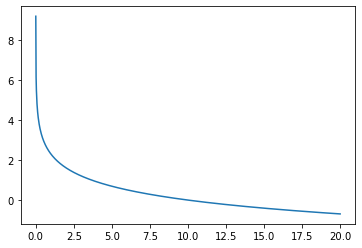

In [9]:
fig, ax = plt.subplots()
ax.plot(t, -np.log(y))

In [15]:
torch.is_tensor

<function torch.is_tensor(obj)>

In [12]:
np.trapz(-np.log(y), t)

6.142210149899097

In [11]:
(-np.log(y)).sum() / (t[1] - t[0])

15537.546579479244

In [30]:
import torch
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.optim import AdamW

In [31]:
model = torch.nn.Linear(2, 2)
init_lr = 1e-1
min_lr = 0.
num_epochs = 10
num_iters = 100
optimizer = AdamW(model.parameters(), lr=init_lr)
scheduler = CosineAnnealingLR(optimizer, T_max=num_epochs, eta_min=min_lr)

In [32]:
lrs = []

for epoch in range(num_epochs):
    for i in range(num_iters):
        lrs.append(optimizer.param_groups[0]["lr"])
        optimizer.step()
    scheduler.step()
    lrs.append(optimizer.param_groups[0]["lr"])

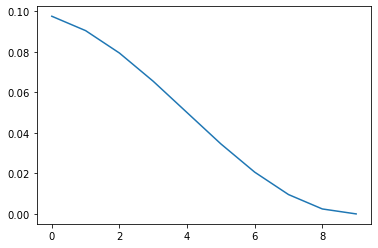

In [33]:
import matplotlib.pyplot as plt

plt.plot(lrs)

In [5]:
import torch
import math

In [13]:
import numpy as np

In [4]:
n = 1e9

In [7]:
n % math.pi

0.5773954624831035

In [8]:
math.fmod(n, math.pi)

0.5773954624831035

In [9]:
torch.tensor([n], device="cpu", dtype=torch.float64) % math.pi

tensor([0.5774], dtype=torch.float64)

In [27]:
torch.tensor([n], device="cpu", dtype=torch.float32) % math.pi

tensor([-64.])

In [28]:
np.remainder(np.array([n], dtype=np.float33), math.pi)

array([1.024195], dtype=float32)

In [34]:
torch.tensor([n], device="cpu", dtype=torch.float64) % math.pi

tensor([0.5774], dtype=torch.float64)

In [29]:
torch.tensor([n], device="cpu", dtype=torch.float32) % math.pi

tensor([-64.])

In [30]:
torch.remainder(torch.tensor([n], device="cpu", dtype=torch.float32), math.pi)

tensor([-64.])

In [31]:
torch.fmod(torch.tensor([n], device="cpu", dtype=torch.float32), math.pi)

tensor([1.0242])

In [32]:
torch.remainder(torch.tensor([n], device="cuda", dtype=torch.float32), math.pi)

tensor([-33.5333], device='cuda:0')

In [36]:
torch.fmod(torch.tensor([n], device="cuda", dtype=torch.float32), math.pi)

tensor([1.0242], device='cuda:0')

In [37]:
torch.fmod(torch.tensor([n], device="cuda", dtype=torch.float64), math.pi)

tensor([0.5774], device='cuda:0', dtype=torch.float64)

In [38]:
torch.fmod(torch.tensor([n], device="cpu", dtype=torch.float64), math.pi)

tensor([0.5774], dtype=torch.float64)

In [39]:
np.remainder(np.array([n], dtype=np.float64), math.pi)

array([0.57739546])